# Хакатон ISP 2021
## Сессия 1.
### Команда Cerebro

In [314]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
data = pd.read_csv("dataset_isp.csv")

# pd.set_option()

In [97]:
df = data.copy(deep=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151926 entries, 0 to 151925
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    151926 non-null  int64 
 1   host          151926 non-null  object
 2   domain        151926 non-null  object
 3   class         136926 non-null  object
 4   subclass      151926 non-null  object
 5   unique_value  151926 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 7.0+ MB


In [98]:
df = df.rename(columns={"Unnamed: 0": "id"})
df.head(3)

,id,host,domain,class,subclass,unique_value
0,0,elasticsearch.cn,elasticsearch,legit,legit,11
1,1,valeculturacaixa.com.br,valeculturacaixa,legit,legit,8
2,2,profitsandsolutions.com,profitsandsolutions,legit,legit,82


## Произведу проверку на пустые значения у объектов по всех признаках

In [99]:
df['class'].unique()

array(['legit', 'dga', nan], dtype=object)

In [100]:
df['subclass'].unique()

array(['legit', 'cryptolocker', 'goz', 'newgoz'], dtype=object)

In [101]:
nan_str = {}

for col in df.columns:
    nan_str[col] = df[df[col].astype(str).str.contains('nan')].id.count()
    
nan_str

{'id': 0,
 'host': 322,
 'domain': 322,
 'class': 15000,
 'subclass': 0,
 'unique_value': 0}

In [102]:
df[df['class'].isnull()]

,id,host,domain,class,subclass,unique_value
10,10,rlisducnxamdrgp.ru,rlisducnxamdrgps,NaN,cryptolocker,71
28,28,1d8p3jkuso8bg1oqxh6a1pszue.net,1d8p3jkuso8bg1oqxh6a1pszues,NaN,newgoz,96
38,38,swifbuxorcojbpoznjaynrcyhiov.ru,swifbuxorcojbpoznjaynrcyhiovs,NaN,goz,34
55,55,sarewryivbdj.ru,sarewryivbdjs,NaN,cryptolocker,48
56,56,hwpqakbosqmy.ru,hwpqakbosqmys,NaN,cryptolocker,41
...,...,...,...,...,...,...
151880,151880,yhpvlscilfijayeainfixsmrmr.ru,yhpvlscilfijayeainfixsmrmrs,NaN,goz,63
151889,151889,gemzlnrfiippdprkuxof.ru,gemzlnrfiippdprkuxofs,NaN,goz,92
151896,151896,iasuqkjpwtgwk.ru,iasuqkjpwtgwks,NaN,cryptolocker,96
151904,151904,nywxcuivinbu.ru,nywxcuivinbus,NaN,cryptolocker,98


In [103]:
df[df['host'].isnull()]

,id,host,domain,class,subclass,unique_value


### Пустых значений в host & domain нет, в class 15000 пустых значений

In [104]:
df = df.dropna()
df['class'].unique()
df

,id,host,domain,class,subclass,unique_value
0,0,elasticsearch.cn,elasticsearch,legit,legit,11
1,1,valeculturacaixa.com.br,valeculturacaixa,legit,legit,8
2,2,profitsandsolutions.com,profitsandsolutions,legit,legit,82
3,3,logismarket.com,logismarket,legit,legit,3
4,4,ydiilygmxbke.ru,ydiilygmxbke,dga,cryptolocker,89
...,...,...,...,...,...,...
151921,151921,teklinks.com,teklinks,legit,legit,62
151922,151922,erfmcmwcbitugeqgewsqwlknzxxk.ru,erfmcmwcbitugeqgewsqwlknzxxk,dga,goz,89
151923,151923,portalinformatica.com.br,portalinformatica,legit,legit,74
151924,151924,rmbthboxxlljx.ru,rmbthboxxlljx,dga,cryptolocker,88


# Проведём проверку на наличие дубликатов:

In [105]:
df[df['host'].duplicated()]

,id,host,domain,class,subclass,unique_value
2596,2596,17l8zhe1cttfbv5avgvqr08p.org,17l8zhe1cttfbv5avgvqr08p,dga,newgoz,10
3573,3573,aduanet.gob.pe,aduanet,legit,legit,23
4283,4283,3u5wzp7ts0ul1qpunml1eort4j.biz,3u5wzp7ts0ul1qpunml1eort4j,dga,newgoz,9
5763,5763,njkhdnkaovkp.ru,njkhdnkaovkp,dga,cryptolocker,74
5926,5926,usadserver.com,usadserver,legit,legit,66
...,...,...,...,...,...,...
151792,151792,1ffzbngro7vjx6500erzvvye9.org,1ffzbngro7vjx6500erzvvye9,dga,newgoz,42
151868,151868,1lyy72x1yk001f1khbo2xlc3gan.biz,1lyy72x1yk001f1khbo2xlc3gan,dga,newgoz,69
151881,151881,sexomercadobcn.com,sexomercadobcn,legit,legit,16
151883,151883,fxabivmibpld.ru,fxabivmibpld,dga,cryptolocker,96


In [106]:
df[df['host']=='aduanet.gob.pe']

,id,host,domain,class,subclass,unique_value
1169,1169,aduanet.gob.pe,aduanet,legit,legit,23
3573,3573,aduanet.gob.pe,aduanet,legit,legit,23
21381,21381,aduanet.gob.pe,aduanet,legit,legit,23
136819,136819,aduanet.gob.pe,aduanet,legit,legit,23


### Найдено 3000 дубликатов, принято решение дропнуть их

In [108]:
df = df.drop_duplicates(subset=['host'])
df

,id,host,domain,class,subclass,unique_value
0,0,elasticsearch.cn,elasticsearch,legit,legit,11
1,1,valeculturacaixa.com.br,valeculturacaixa,legit,legit,8
2,2,profitsandsolutions.com,profitsandsolutions,legit,legit,82
3,3,logismarket.com,logismarket,legit,legit,3
4,4,ydiilygmxbke.ru,ydiilygmxbke,dga,cryptolocker,89
...,...,...,...,...,...,...
151921,151921,teklinks.com,teklinks,legit,legit,62
151922,151922,erfmcmwcbitugeqgewsqwlknzxxk.ru,erfmcmwcbitugeqgewsqwlknzxxk,dga,goz,89
151923,151923,portalinformatica.com.br,portalinformatica,legit,legit,74
151924,151924,rmbthboxxlljx.ru,rmbthboxxlljx,dga,cryptolocker,88


In [133]:
df[df['class']=='dga']

,id,host,domain,class,subclass,unique_value
4,4,ydiilygmxbke.ru,ydiilygmxbke,dga,cryptolocker,89
8,8,lkqedbaapnjts.ru,lkqedbaapnjts,dga,cryptolocker,46
12,12,imspxyqruxvris.ru,imspxyqruxvris,dga,cryptolocker,42
22,22,nvscdusclrzdfmdalvknhminuklnx.ru,nvscdusclrzdfmdalvknhminuklnx,dga,goz,93
25,25,vshrgydwscevnfdudjqivirkj.ru,vshrgydwscevnfdudjqivirkj,dga,goz,62
...,...,...,...,...,...,...
151912,151912,rginofdljdetcmzpofpzrxczlozl.ru,rginofdljdetcmzpofpzrxczlozl,dga,goz,55
151913,151913,1o24km41ymcdj91f7kvmk1x9td0m.org,1o24km41ymcdj91f7kvmk1x9td0m,dga,newgoz,28
151917,151917,smxdfkquggnmn.ru,smxdfkquggnmn,dga,cryptolocker,22
151922,151922,erfmcmwcbitugeqgewsqwlknzxxk.ru,erfmcmwcbitugeqgewsqwlknzxxk,dga,goz,89


In [135]:
df = df.reset_index(drop=True)
df

,id,host,domain,class,subclass,unique_value
0,0,elasticsearch.cn,elasticsearch,legit,legit,11
1,1,valeculturacaixa.com.br,valeculturacaixa,legit,legit,8
2,2,profitsandsolutions.com,profitsandsolutions,legit,legit,82
3,3,logismarket.com,logismarket,legit,legit,3
4,4,ydiilygmxbke.ru,ydiilygmxbke,dga,cryptolocker,89
...,...,...,...,...,...,...
133921,151921,teklinks.com,teklinks,legit,legit,62
133922,151922,erfmcmwcbitugeqgewsqwlknzxxk.ru,erfmcmwcbitugeqgewsqwlknzxxk,dga,goz,89
133923,151923,portalinformatica.com.br,portalinformatica,legit,legit,74
133924,151924,rmbthboxxlljx.ru,rmbthboxxlljx,dga,cryptolocker,88


## Для корреляционного анализа переведу текстовые значения 'dga' and 'leigt' в числовые аналоги

In [138]:
df['class'] = df['class'].apply(lambda x: 1 if x=='dga' else 0)

df['subclass'] = df['subclass'].apply(lambda x: 0 if x=='legit'
                                      else 1 if x=='cryptolocker'
                                      else 2 if x=='goz'
                                      else 3 if x=='newgoz'
                                      else x)

KeyboardInterrupt: 

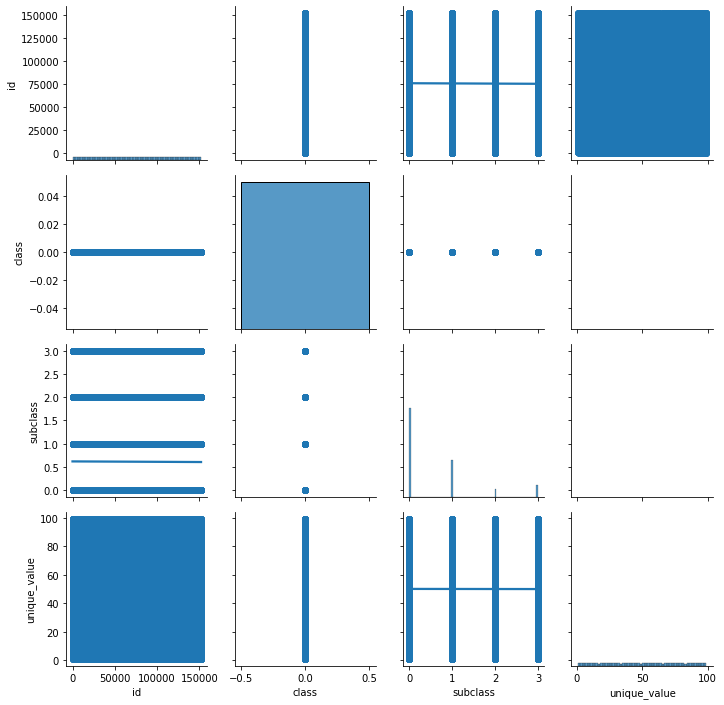

In [150]:
sns.pairplot(df, kind='reg')

In [159]:
df[df['subclass']==4]

,id,host,domain,class,subclass,unique_value


In [160]:
df.corr()

,id,class,subclass,unique_value
id,1.000000,NaN,-0.004265,-0.006135
class,NaN,NaN,NaN,NaN
subclass,-0.004265,NaN,1.000000,-0.001070
unique_value,-0.006135,NaN,-0.001070,1.000000


## По результатам анализа графиков и матрицы корреляций приянто решение убрать столбцы: id, host, class, unique_value

По анализу номинативных признаков решили работать со столбцом 'domain'

In [163]:
df = df.drop(['id', 'class', 'unique_value', 'host'], axis=1)

KeyError: "['id' 'class' 'unique_value'] not found in axis"

# Теперь необходимо сбалансировать выборку, определив примерно равное количество значений каждого класса

In [177]:
df[df['domain'].duplicated()]

,domain,subclass
250,vistaprint,0
494,adwords,0
794,elections,0
950,president,0
1037,skyscanner,0
...,...,...
133899,ionline,0
133903,citibankonline,0
133907,gravatar,0
133909,ztedevice,0


In [182]:
# Убираем дубликаты позле отказа от столбца 'host'
df = df.drop_duplicates()
df

,domain,subclass
0,elasticsearch,0
1,valeculturacaixa,0
2,profitsandsolutions,0
3,logismarket,0
4,ydiilygmxbke,1
...,...,...
133920,unionguanajuato,0
133921,teklinks,0
133922,erfmcmwcbitugeqgewsqwlknzxxk,2
133923,portalinformatica,0


In [187]:
df.groupby('subclass').count()

,domain
subclass,
0,61860
1,34319
2,7347
3,10999


In [213]:
dfbin = df.copy(deep=True)

In [214]:
dfbin['subclass'] = dfbin['subclass'].apply(lambda x: 0 if x==0
                                else 1 if x in (1,2,3)
                                else x)

In [215]:
dfbin.groupby('subclass').count()

,domain
subclass,
0,61860
1,52665


In [216]:
drop_indices = np.random.choice(df[df['subclass']==0].index, 6530, replace=False)
dfbin = dfbin.drop(drop_indices)
dfbin

,domain,subclass
0,elasticsearch,0
1,valeculturacaixa,0
2,profitsandsolutions,0
3,logismarket,0
4,ydiilygmxbke,1
...,...,...
114520,unionguanajuato,0
114521,teklinks,0
114522,erfmcmwcbitugeqgewsqwlknzxxk,1
114523,portalinformatica,0


In [217]:
dfbin = dfbin.reset_index(drop=True)

In [219]:
dfbin.groupby('subclass').count()

,domain
subclass,
0,55330
1,52665


### Бинарная выборка получилась достаточно сбалансированной

In [220]:
dfbin.to_csv('bin_dataset_isp.csv')

In [229]:
dfmulti = df.copy(deep=True)

In [231]:
drop_indices = np.random.choice(df[df['subclass']==0].index, 24000, replace=False)
dfmulti = dfmulti.drop(drop_indices)
dfmulti = dfmulti.reset_index(drop=True)

In [233]:
dfmulti.groupby('subclass').count()

,domain
subclass,
0,37836
1,34319
2,7347
3,10999


In [234]:
dfmulti.to_csv('mlti_dataset_isp.csv')

In [247]:
multileon = dfmulti.copy(deep=True)

In [248]:
multileon = multileon[multileon.subclass != 0]

In [253]:
drop_indices = np.random.choice(multileon[multileon['subclass']==1].index, 13000, replace=False)
multileon = multileon.drop(drop_indices)
multileon = multileon.reset_index(drop=True)

In [256]:
multileon.to_csv('multileon_dataset_isp.csv')

## MULTI dataset примерно сбалансирован

# Приступаем к разбиению на тренировочную и тестовую выборки

In [257]:
dictinary = {'0':0, '1':1, '2':2, '3':3, '4':4, '5':5, '6':6,
	         '7':7, '8':8, '9':9, 'a':10, 'b':11, 'c':12, 'd':13, 
	         'e':14, 'f':15, 'g':16, 'h':17, 'i':18, 'j':19, 'k':20, 
	         'l':21, 'm':22, 'n':23, 'o':24, 'p':25, 'q':26, 'r':27,
	         's':28, 't':29, 'u':30, 'v':31, 'w':32, 'x':33, 'y':34,
	         'z':35, '!':36, '-':37, '.':38, '_':39, 'S':40}



### Задаем словарь значений для каждого символа и делаем все значения в признаке 'domain' одинаковой длины, пустые места заполняем символом '!'

In [311]:
# Препроцессинг

# Функция для заполнения пустых символов
def _pad(domain, max_length=63):
    if len(domain) < max_length:
        domain = '!' * (max_length - len(domain)) + domain
    
    return domain

# Функция по преобразованию домена 
def pad_domain(data, pad_fn=_pad):
    data['domain'] = data['domain'].map(pad_fn)
    data.to_csv('data_bin_pad.csv', index=False)
    
    return data

# Разделение каждого символа домена на отдельный столбец 
# + нормализация, приведение всех строк к одинаковой длине 
def _split_domain(domain, sep='?'):
    result = []
    
    for ch in domain:
        result.append(ch)
        
    result = list(map(lambda x: x.lower(), result))
                  
    return sep.join(result)
                  
                
def split_domain(data, split_fn=_split_domain, sep='?'):
    data = pd.concat([pd.DataFrame(data['domain'].map(split_fn).values),
                      data['subclass']], axis=1)
                  
    data.columns = ['domain', 'subclass']
                  
    cols = ['domain%d' %d for d in range(0, 63)]
    data[cols] = data['domain'].str.split(sep, expand=True)
    data = data[cols + ['subclass']]
    data.to_csv('bin_data\./data_bin_split.csv', index=False)
                  
    return data


def id_encoding(data, dictionary, embeding_cols):
    data[embeding_cols] = data[embeding_cols]\
    .apply(lambda x: x.map(dictionary))
    data = data[embeding_cols + ['subclass']]
    data.to_csv('bin_data\./bin_data_encode.csv', index=False)
    
    return data

In [313]:
dfbin = pad_domain(dfbin)
dfbin = split_domain(dfbin)

em_cols = ['domain%d' %d for d in range(0, 63)]
dfbin = id_encoding(dfbin, dictinary, em_cols)

dfbin.head()

,domain0,domain1,domain2,domain3,domain4,domain5,domain6,domain7,domain8,domain9,...,domain54,domain55,domain56,domain57,domain58,domain59,domain60,domain61,domain62,subclass
0,36,36,36,36,36,36,36,36,36,36,...,29,18,12,28,14,10,27,12,17,0
1,36,36,36,36,36,36,36,36,36,36,...,29,30,27,10,12,10,18,33,10,0
2,36,36,36,36,36,36,36,36,36,36,...,28,24,21,30,29,18,24,23,28,0
3,36,36,36,36,36,36,36,36,36,36,...,16,18,28,22,10,27,20,14,29,0
4,36,36,36,36,36,36,36,36,36,36,...,18,21,34,16,22,33,11,20,14,1


In [312]:
dfbin = pd.read_csv('bin_dataset_isp.csv')

## Мы закодировали каждый символ уникальным числовым значением и преобразовали наш датасет


# Разобьём датасеты на тестовые и обучающие выборки

In [342]:
# Функция по разделению датасета на выборки

def train_val_test_data_split(file, test_size=0.15, val_size=0.15):
    
    cols = ['domain%d' for d in range(0,63)] + ['subclass']
    data = pd.read_csv(str(file) + '.csv')
    data = data.drop('Unnamed: 0', axis=1)
    x = data.iloc[:, 0:-1]
    y = data.iloc[:, -1]
    
    x_train_and_val, x_test, y_train_and_val, y_test = train_test_split(x, y, test_size=test_size)
    x_train, x_val, y_train, y_val = train_test_split(x_train_and_val, y_train_and_val, test_size=val_size)
    
    train = pd.concat([x_train, y_train], axis=1)
    train.colsumns = cols
    train.to_csv('bin_data/train_ord_encode.csv', index=False)
    
    test = pd.concat([x_test, y_test], axis=1)
    test.columns = cols
    test.to_csv('bin_data/test_ord_encode.csv', index=False)
    
    val = pd.concat([x_val, y_val], axis=1)
    val.columnsns = cols
    val.to_csv('bin_data/val_ord_encode.csv', index=False)

In [343]:
train_val_test_data_split('bin_data_encode')


C:\Users\mkitVR\AppData\Local\Temp/ipykernel_20432/4112518290.py:15: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.colsumns = cols
C:\Users\mkitVR\AppData\Local\Temp/ipykernel_20432/4112518290.py:23: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  val.columnsns = cols


In [349]:
test = pd.read_csv('bin_data/val_ord_encode.csv')

In [350]:
test

,domain0,domain1,domain2,domain3,domain4,domain5,domain6,domain7,domain8,domain9,...,domain54,domain55,domain56,domain57,domain58,domain59,domain60,domain61,domain62,subclass
0,36,36,36,36,36,36,36,36,36,36,...,33,24,0,13,34,30,15,1,21,1
1,36,36,36,36,36,36,36,36,36,36,...,29,34,1,30,17,6,26,34,4,1
2,36,36,36,36,36,36,36,36,36,36,...,14,20,14,24,22,27,24,14,25,0
3,36,36,36,36,36,36,36,36,36,36,...,13,37,30,25,13,10,29,14,28,0
4,36,36,36,36,36,36,36,36,36,36,...,16,3,3,35,34,9,27,25,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13765,36,36,36,36,36,36,36,36,36,36,...,26,10,19,32,20,21,32,15,12,1
13766,36,36,36,36,36,36,36,36,36,36,...,26,33,24,35,12,21,26,30,15,1
13767,36,36,36,36,36,36,36,36,36,36,...,24,15,15,18,12,14,25,27,24,0
13768,36,36,36,36,36,36,36,36,36,36,...,19,16,19,12,29,13,15,10,17,1


# В результате проделанной работы были выявлены и удалены 15000 NaN значений у признака 'class', было удалено 3000 дубликатов признака.  

# После этого было принято решение работать со значениями столбцов 'domain' & 'subclass'. Было удалено 19000 дубликатов признака 'domain'. В результате получился датасет из 107995 образцов.

# После написан ряд функций для нормализации domain и преобразования символов в уникальные числовые значения

# Дальшe было получено 3 датасета, val_ord_encode.csv &  train_ord_encode.csv для обучения нейронной сети и test_ord_encode.csv для проверки корректности работы.